<h3>Lendo o arquivo gerado com todos os anos<h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
anos = pd.read_csv('dados_com_ano.csv', sep=',')

Agrupando por país, UF, ano e filtando a uf por Rio de Janeiro

In [2]:
anos = anos.groupby(['País', 'UF', 'ano'], as_index=False).agg({'Chegadas':'sum'})
rio  = anos.loc[(anos.UF == 'Rio de Janeiro')]

Criando um dicionário de DataFrames de todos os países

In [3]:
paises      = rio['País'].unique()
dict_paises = {}
for pais in paises:
    dict_paises[f'{pais}'] = rio[rio['País']==pais]

Listando top 20, top 10,filtrando o df e organizando

In [4]:
countries  = ['Angola', 'Suíça', 'Noruega', 'Rússia', 'China', 'Canadá', 'Austrália', 'Uruguai', 'Holanda', 'Colômbia', 'Espanha', 'Portugal', 'Itália', 'Alemanha', 'Reino Unido', 'Chile', 'França', 'Estados Unidos', 'Argentina']
countries1 = ['Espanha', 'Portugal', 'Itália', 'Alemanha', 'Reino Unido', 'Chile', 'França', 'Estados Unidos', 'Argentina']
rio1       = rio.query('País == @countries1')
rio1       = rio1.sort_values('Chegadas',ascending=False)

Criando lineplot do top 10, entretando não teve muita visibilidade

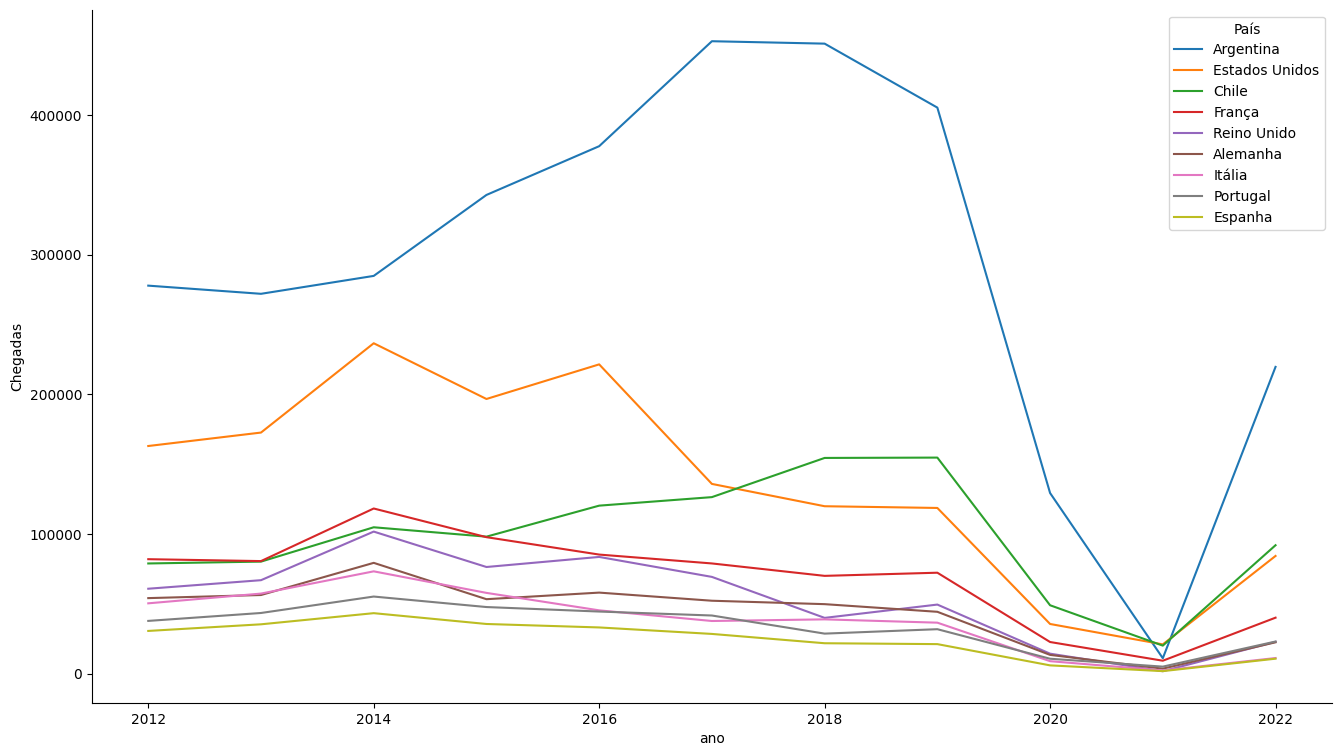

In [5]:
plt.figure(figsize=(16,9))
sns.lineplot(x="ano", y="Chegadas",
             hue  = "País",
             data = rio1)
    
sns.despine()

Criando gráfico barra para melhorar visualização

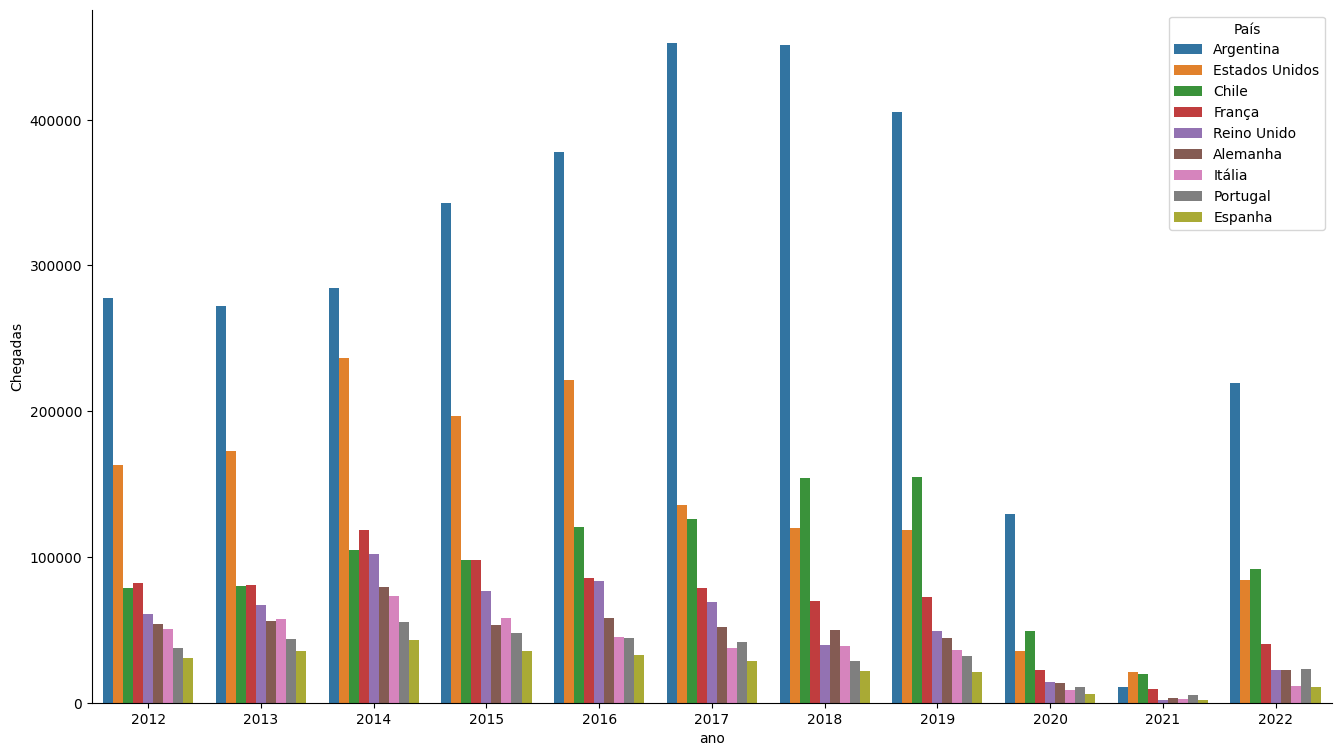

In [6]:
plt.figure(figsize=(16,9))

sns.barplot(x="ano", y="Chegadas",
             hue  = "País",
             data = rio1)
    
sns.despine()

Adicionando uma coluna com as linguas faladas nos países que compõe o top 10

In [7]:
linguas = {
    'Português': ['Angola', 'Portugal'],
    'Espanhol' : ['Argentina', 'Colômbia', 'Uruguai','Chile','Espanha'],
    'Inglês'   : ['Austrália', 'Canadá', 'Estados Unidos', 'Reino Unido'],
    'Francês'  : ['França'],
    'Alemão'   : ['Alemanha','Suíça'],
    'Italiano' : ['Itália'],
    'Norueguês': ['Noruega'],
    'Russo'    : ['Rússia'],
    'Holandês' : ['Holanda'],
    'Mandarim' : ['China']
}

for i, row in rio1.iterrows():
    for lingua, paises in linguas.items():
        if row['País'] in paises:
            rio1.loc[i, 'lingua'] = lingua
            break

Criando um ranking de linguas mais faladas

In [8]:
rio2 = rio1.groupby(['lingua']).sum().reset_index().sort_values('Chegadas',ascending = True)

rio2 = rio2.sort_values('Chegadas',ascending=False)

C:\Users\Igor\AppData\Local\Temp\ipykernel_11828\1913587013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rio2 = rio1.groupby(['lingua']).sum().reset_index().sort_values('Chegadas',ascending = True)


Criando stacked bar chart

<Figure size 640x480 with 0 Axes>

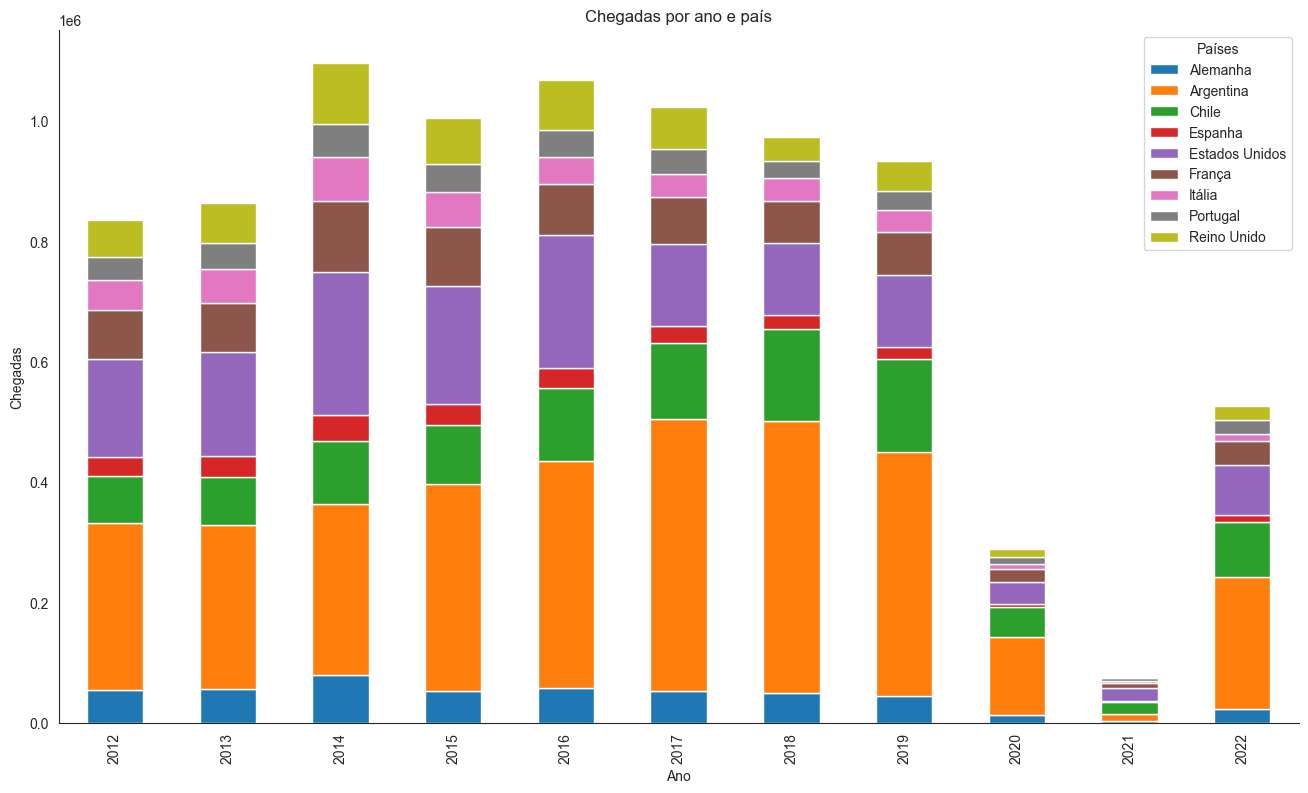

In [9]:
data = rio1.pivot_table(index='ano', columns='País', values='Chegadas')
sns.set_style("white")
sns.despine()
stacked_bar = data.plot(kind='bar', stacked=True, figsize=(16, 9))
stacked_bar.set_title("Chegadas por ano e país")
stacked_bar.set_xlabel("Ano")
stacked_bar.set_ylabel("Chegadas")
stacked_bar.legend(title='Países')
stacked_bar.spines[['right', 'top']].set_visible(False)

Criando stacked bar chart normalizado para mais visibilidade

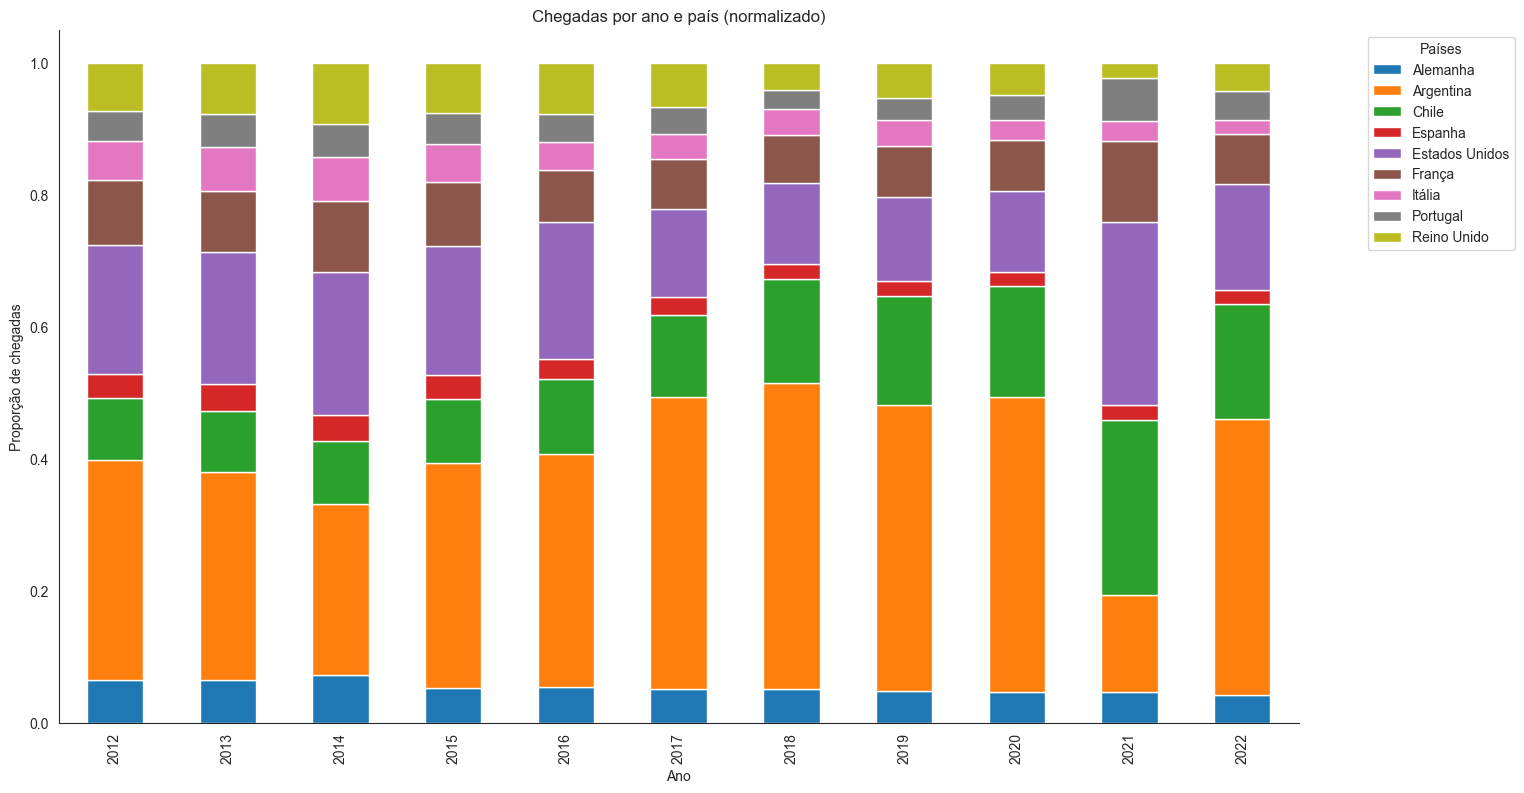

In [10]:
data = rio1.pivot_table(index='ano', columns='País', values='Chegadas')

data_norm = data.div(data.sum(axis=1), axis=0)

stacked_bar_norm = data_norm.plot(kind='bar', stacked=True, figsize=(16, 9))
sns.set_style("white")
sns.despine()
stacked_bar_norm.set_title("Chegadas por ano e país (normalizado)")
stacked_bar_norm.set_xlabel("Ano")
stacked_bar_norm.set_ylabel("Proporção de chegadas")
stacked_bar_norm.legend(title='Países',bbox_to_anchor=(1.05, 1))
plt.show()
